In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the dataset file
data = pd.read_csv('BreastCancerData (4).csv')

In [3]:
data.head(10)

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0
5,52,14.557711,1,1,1,1,1,14,0,1
6,52,14.604623,1,1,1,0,0,12,0,1
7,49,14.638204,1,1,1,0,0,12,1,0
8,50,14.726225,1,1,1,0,0,13,0,0
9,39,14.887039,1,1,0,0,0,8,1,1


In [4]:
#Get a count of the number of cancer positive (1) or cancer negative(0) 
data['Cancer Positive'].value_counts()

0    1422
1     966
Name: Cancer Positive, dtype: int64

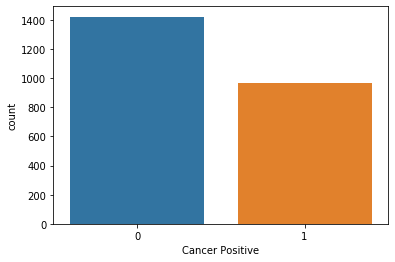

In [5]:
#Visualize the count
sns.countplot(data['Cancer Positive'], label='count')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data[['Age', 'BMI', 'BreastFeeding', 'Marital Status', 'Alcohol', 'Smoking',
       'BreastCancerHistory', 'Age at firstPeriod', 'MenstrualCycle']]
y = data['Cancer Positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
#Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 101)

In [12]:
tree.fit(X_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [13]:
tree_prediction = tree.predict(X_test)

In [14]:
tree_prediction

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [15]:
print(classification_report(y_test,tree_prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       468
           1       0.97      0.95      0.96       321

    accuracy                           0.97       789
   macro avg       0.97      0.97      0.97       789
weighted avg       0.97      0.97      0.97       789



In [16]:
print(confusion_matrix(y_test,tree_prediction))

[[459   9]
 [ 16 305]]


In [17]:
#Creating a pickel file using the joblib library
import joblib as jb

In [18]:
jb.dump(tree,'model3.pkl')

['model3.pkl']

In [19]:
data.columns

Index(['Age', 'BMI', 'BreastFeeding', 'Marital Status', 'Alcohol', 'Smoking',
       'BreastCancerHistory', 'Age at firstPeriod', 'MenstrualCycle',
       'Cancer Positive'],
      dtype='object')

In [20]:
model = jb.load('model3.pkl')

In [21]:
print(model.predict([[23,19.5,0,3,0,0,0,13,1]]))

[0]


In [22]:
print(model.predict([[20,17.5,0,3,0,0,0,13,0]]))

[0]


In [23]:
print(model.predict([[20,17.5,0,3,0,0,0,13,1]]))

[0]


In [24]:
print(model.predict([[48,30.0,1,1,0,0,0,13,0]]))

[1]


In [25]:
print(model.predict([[23,19.5,0,3,0,0,0,13,1]]))

[0]


In [26]:
print(model.predict([[21,30.1,0,3,0,0,0,13,1]]))

[1]


In [27]:
print(model.predict([[21,30.1,0,3,0,0,0,13,1]]))

[1]
